<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/Multiclass_to_Binary_Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiclass_to_binary_mask

Downloading SVLS and Surface Dice codes

Install require packages:

In [2]:
!pip install -U -q SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 10.3 MB/s eta 0:00:00


### Download Dataset and Trained Models

In [3]:
!gdown 1oZ9z-l9lBjKGNZCCTK819Z1ufwe90mg3
!unzip -q train_valid.zip

Downloading...
From (original): https://drive.google.com/uc?id=1oZ9z-l9lBjKGNZCCTK819Z1ufwe90mg3
From (redirected): https://drive.google.com/uc?id=1oZ9z-l9lBjKGNZCCTK819Z1ufwe90mg3&confirm=t&uuid=ca667cad-b1d1-47c4-9040-cdbd2aa29cc6
To: /content/SVLS/train_valid.zip
100% 535M/535M [00:08<00:00, 59.8MB/s]


In [15]:
import SimpleITK as sitk
import numpy as np

path_folder = '/content/SVLS/train_valid/BraTS19_2013_0_1/BraTS19_2013_0_1_seg.nii.gz'

# Load the NIfTI image
mask_mutliclass = sitk.ReadImage(path_folder)

# Extract metadata (header information)
origin = mask_mutliclass.GetOrigin()  # Spatial position of the image
spacing = mask_mutliclass.GetSpacing()  # Voxel size
direction = mask_mutliclass.GetDirection()  # Orientation matrix

# Print header information
print("Origin:", origin)
print("Spacing:", spacing)
print("Direction:", direction)

# Extract mask data as an array and split it to binary mask

mask_mutliclass_array = sitk.GetArrayFromImage(mask_mutliclass)
list_classes = np.unique(mask_mutliclass_array)[1:] #[1:] to ignore background
for cls in list_classes:
    mask_class_ = np.zeros (mask_mutliclass_array.shape)
    mask_class_[mask_mutliclass_array==cls] = 1
    output_image = sitk.GetImageFromArray(mask_class_)
    output_image.SetOrigin(origin)
    output_image.SetSpacing(spacing)
    output_image.SetDirection(direction)
    sitk.WriteImage(output_image, "binary_mask_cls_{}.nii.gz".format(cls))




Origin: (0.0, -239.0, 0.0)
Spacing: (1.0, 1.0, 1.0)
Direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


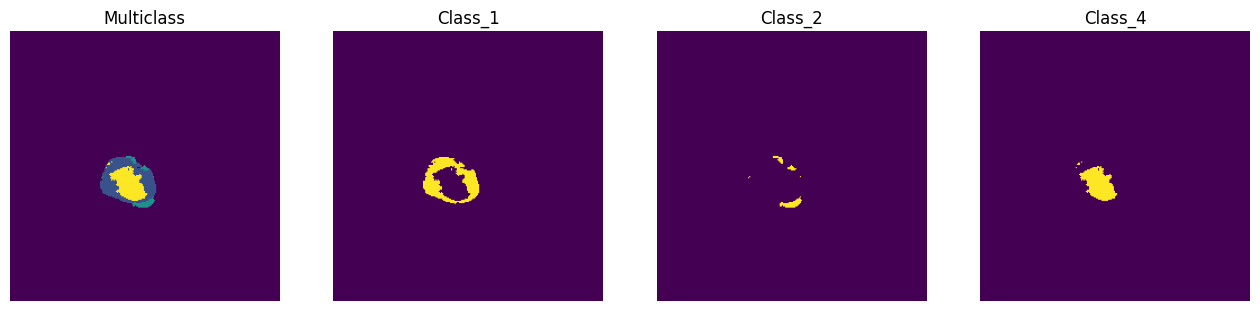

In [42]:
import matplotlib.pyplot as plt
mask_class_1 = sitk.GetArrayFromImage(sitk.ReadImage('/content/SVLS/binary_mask_cls_1.nii.gz'))
mask_class_2 = sitk.GetArrayFromImage(sitk.ReadImage('/content/SVLS/binary_mask_cls_2.nii.gz'))
mask_class_4 = sitk.GetArrayFromImage(sitk.ReadImage('/content/SVLS/binary_mask_cls_4.nii.gz'))

plt.figure(figsize=(16, 4))  # Adjust figure size
plt.subplot(1,4,1);plt.imshow(mask_mutliclass_array[60])
plt.axis('OFF');
plt.title("Multiclass");

plt.subplot(1,4,2);plt.imshow(mask_class_1[60])
plt.axis('OFF');
plt.title("Class_1");

plt.subplot(1,4,3);plt.imshow(mask_class_2[60])
plt.axis('OFF');
plt.title("Class_2");

plt.subplot(1,4,4);plt.imshow(mask_class_4[60])
plt.axis('OFF');
plt.title("Class_4");